# Variation in planetary radii with density

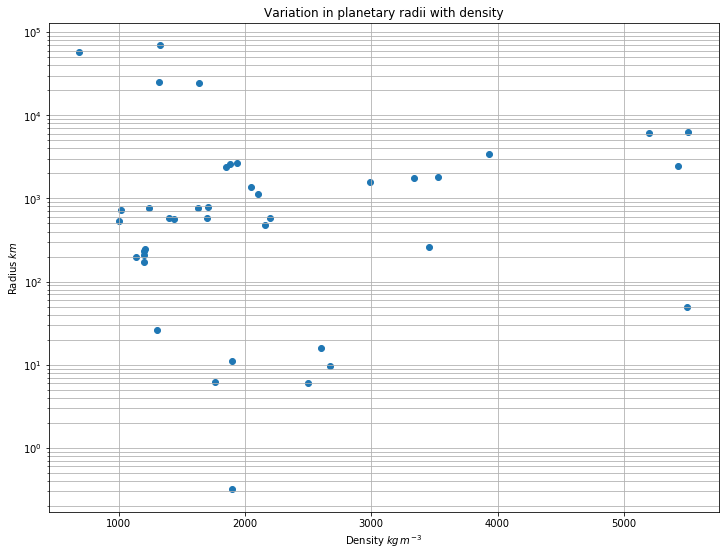

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

planetary_data = pd.read_excel('planetary_data.xlsx', sheet_name='Sheet1', header=0)

radius = planetary_data['Radius /km']
density = planetary_data['Density /kgm-3']

plt.figure(figsize=(12, 9))
plt.scatter(density, radius)
plt.title('Variation in planetary radii with density')
plt.xlabel('Density $kg\,m^{-3}$')
plt.ylabel('Radius $km$')
plt.yscale('log')
plt.grid(axis='both', which='both')
plt.show()
plt.close()

## Using scikit-learn and K-means clustering to classify planetary bodies

With the planetary data plotted by density and radius as above, we can attempt to group each body into a number of classification groups. We will arrange the data into the following categories:

* Giant planets: this should include Jupiter, Saturn, Uranus and Neptune.
* Terrestrial planets: as well as the four inner planets, we would expect rocky moons like Io and Europa to fit this category.
* Icy moons, for example Ganymede and Titan ("yes, sir, I've been around...").
* Asteroids and comets. This should also include smaller, irregular-shaped moons.

Scikit-learn is a widely used machine learning library for Python and provides a range of tools for the problem described above. We will not make any leading assumptions about the bodies and will therefore not assign any initial categories for them. Therefore, this becomes an unsupervised classification problem. The K-means clustering algorithm lends itself particularly well to problems of this description.

To begin with, we will import the `sklearn.cluster` and `numpy` packages.

In [2]:
import sklearn.cluster as cluster
import numpy as np

We have designated four-categories above, so will create a dict to map numeric categories to colours. This will allow us to distinguish the category of each body in a scatter plot.

In [3]:
colour_dict = {0: 'r', 1: 'g', 2: 'b', 3: 'y'}

The next stage is to actually training the clustering algorithm. We will not be using this to predict the categories of new samples, so training against the complete dataset is satisfactory here. In this case, the clustering algorithm works best against logarithmic data, so we will make this transformation. This will then need to be transposed before calling the `KMeans` function itself.

In [28]:
# Create the learning algorithm, fitted to the planetary data
log_data = np.array([np.log10(x) for x in [density, radius]]).transpose()
kmeans = cluster.KMeans(n_clusters=len(colour_dict), random_state=0).fit(log_data)

# Determine the clusters using this algorithm and fit this to the planetary data
planetary_data['Cluster'] = kmeans.predict(log_data)

planetary_data

,Body,Density /kgm-3,Radius /km,Cluster
0,Mercury,5430,2440.00,0
1,Venus,5200,6052.00,0
2,Earth,5510,6371.00,0
3,Moon,3340,1738.00,0
4,Mars,3930,3390.00,0
5,Phobos,1900,11.10,1
6,Deimos,1760,6.20,1
7,Jupiter,1330,69910.00,3
8,Io,3530,1821.00,0
9,Europa,2990,1565.00,0


We output the cluster numbers for each body and then ask the user to provide labels for each category. This is a required step as the category assignments are not predictable: we do not know if category 0 will be used for giant planets, for example.

In [29]:
def category_example(i):
    return planetary_data.loc[planetary_data['Cluster'] == i].iloc[0]['Body']

category_labels = {0: 'Terrestrial planet', 1: 'Asteroid/comet', 2: 'Icy moon', 3: 'Gas giant'}

Once the labels have been created, we can update the table to display these.

In [30]:
planetary_data['Category'] = [category_labels[x] for x in planetary_data['Cluster']]
planetary_data

,Body,Density /kgm-3,Radius /km,Cluster,Category
0,Mercury,5430,2440.00,0,Terrestrial planet
1,Venus,5200,6052.00,0,Terrestrial planet
2,Earth,5510,6371.00,0,Terrestrial planet
3,Moon,3340,1738.00,0,Terrestrial planet
4,Mars,3930,3390.00,0,Terrestrial planet
5,Phobos,1900,11.10,1,Asteroid/comet
6,Deimos,1760,6.20,1,Asteroid/comet
7,Jupiter,1330,69910.00,3,Giant planet
8,Io,3530,1821.00,0,Terrestrial planet
9,Europa,2990,1565.00,0,Terrestrial planet


We can finally plot this data. To separate different clusters by colour and label, we iterate over `colour_dict`. Finally, we will output this plot to a PDF file for future reference.

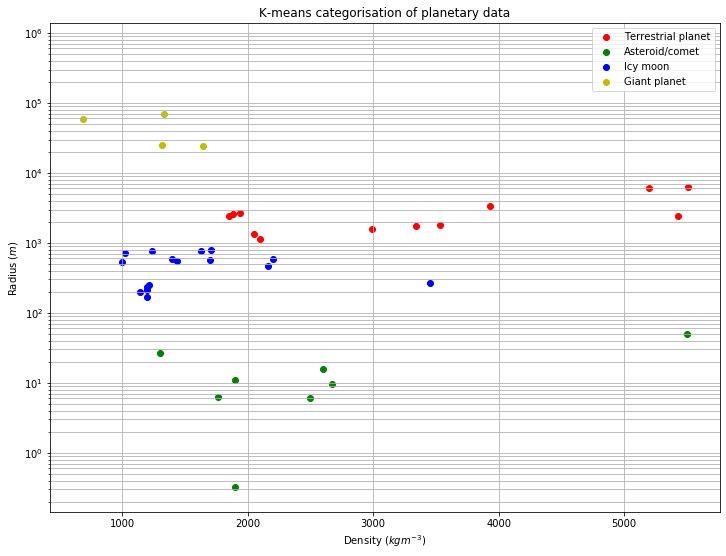

In [31]:
plt.figure(figsize=(12, 9))

plt.title('K-means categorisation of planetary data')
plt.xlabel('Density ($kg m^{-3}$)')
plt.ylabel('Radius ($m$)')
plt.grid(axis='both', which='both')
plt.yscale('log')

for i in range(0, len(colour_dict)):
    subdata = planetary_data.loc[planetary_data['Cluster'] == i]
    plt.scatter(subdata['Density /kgm-3'], subdata['Radius /km'], color=colour_dict[i], label=category_labels[i])

plt.legend(loc='best')

plt.show()
plt.close()

pp.close()